In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data_train=pd.read_csv("../datasets/train_transformed.csv")
data_train

,Unnamed: 0,Age,Flight Distance,Seat comfort,Leg room service,Checkin service,Departure Delay in Minutes,Inflight Comfort and Quality,Customer Service Quality,Convenience and Efficiency,Technological Accessibility,Gender_1,Customer Type_1,Type of Travel_1,satisfaction
0,-1.732034,-1.745279,-0.731539,1.183099,-0.266840,0.549799,0.266393,-0.661833,0.752484,1.094413,-0.724353,1.015031,-0.472767,1.490614,0
1,-1.732001,-0.951360,-0.957184,-1.849315,1.253380,-1.821012,-0.361375,-0.977030,0.966139,0.528270,-0.925584,1.015031,2.115208,-0.670865,0
2,-1.731967,-0.885200,-0.047584,1.183099,-0.266840,0.549799,-0.387532,-0.031440,-0.016673,0.528270,0.013497,-0.985192,-0.472767,-0.670865,1
3,-1.731934,-0.951360,-0.629246,-1.091211,1.253380,-1.821012,-0.099805,-0.661833,0.709753,0.245198,-0.657275,-0.985192,-0.472767,-0.670865,0
4,-1.731901,1.430397,-0.978244,1.183099,0.493270,-0.240472,-0.387532,-0.977030,0.966139,0.811342,-0.925584,1.015031,-0.472767,-0.670865,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1.731901,-1.083680,-1.000307,-1.091211,-1.787061,-1.030742,-0.309061,-1.029563,0.966139,0.528270,-1.026200,-0.985192,2.115208,-0.670865,0
103900,1.731934,0.636478,1.160869,1.183099,1.253380,1.340069,-0.387532,1.229348,-1.127679,-0.887090,1.153810,1.015031,-0.472767,-0.670865,1
103901,1.731967,-0.620561,0.807860,1.183099,-1.026951,1.340069,-0.204433,0.809085,-0.871293,-0.320946,0.717808,1.015031,2.115208,-0.670865,0
103902,1.732001,-1.149840,-0.189991,-1.849315,1.253380,1.340069,-0.387532,-0.189038,0.154250,-0.320946,-0.254812,-0.985192,2.115208,-0.670865,0


In [ ]:
from sklearn.model_selection import train_test_split

target=data_transformed.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (83123, 14) and test set is :(20781, 14)
Prediction result: [0 0 0 ... 0 1 1]
Class 0 (digit 1): 12097
Class 1 (digit 2): 8684
0.8653577787401954
[[10506  1207]
 [ 1591  7477]]


Text(45.72222222222221, 0.5, 'Actual Preference')

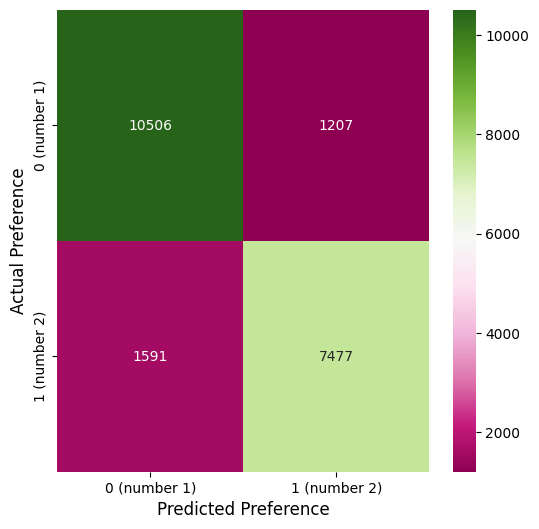

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


X = data_train.drop(["satisfaction"], axis=1)
y = data_train["satisfaction"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )


# create logistic regression model and fit to training data
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr=model_lr.predict(X_test)
print(f"Prediction result: {y_pred_lr}")
print(f"Class 0 (digit 1): {np.count_nonzero(y_pred_lr == 0)}")
print(f"Class 1 (digit 2): {np.count_nonzero(y_pred_lr == 1)}")
score=accuracy_score(y_test,y_pred_lr)
print(score)

# see confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix)


plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='PiYG', xticklabels=['neutral or dissatisfied', 'satisfied'], yticklabels=['neutral or dissatisfied', 'satisfied'])
plt.xlabel('Predicted Preference', fontsize=12)
plt.ylabel('Actual Preference', fontsize=12)
# print(f"Accuracy of Logistic Regression is : {round(accuracy*100,2)} % .")

# report=classification_report(y_test,y_pred_lr)
# print("Classification Report is : \n",report)